# Определение перспективного тарифа для телеком компании

## Описание проекта


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Шаг 1. Откроем файлы и изучим данные

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

pd.set_option('display.max_columns', 500)

calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
# в описании говорится, что если пользователь говорил 0,5 минут, то защитывается 1 минута
# добавим столбец с полными минутами
import math 

def ceil_data(time):
    return math.ceil(time)

calls['duration_full'] = calls['duration'].apply(ceil_data)

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%dT')

In [5]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [6]:
calls.duplicated().sum()

0

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id               202607 non-null object
call_date        202607 non-null datetime64[ns]
duration         202607 non-null float64
user_id          202607 non-null int64
duration_full    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [8]:
calls['year'] = pd.DatetimeIndex(calls['call_date']).year
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [9]:
calls['year'].unique()

array([2018])

In [10]:
calls['month'].unique()

array([ 7,  8,  6,  9, 12, 11, 10,  5,  3,  4,  1,  2])

В таблице calls данные о звонках пользователей. 492 из заявленных 500 когда-либо звонили.
Минуты звонков представлены в типе int, и так округлены. 
Пропусков нет, повторений тоже. Замениили дату звонка на нужный формат. 
id звонка созраняется как id пользоваетя - id звонка для этого пользователя. Оставит формат данных id без изменний.

In [11]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [12]:
internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
#  округлим длительность сессии до большего значения

internet['mb_used_full'] = internet['mb_used'].apply(ceil_data)

In [15]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%dT')

In [16]:
internet['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

In [17]:
internet.drop('Unnamed: 0', 1, inplace = True)

In [18]:
internet.duplicated().sum()

0

In [19]:
internet.head()

,id,mb_used,session_date,user_id,mb_used_full
0,1000_0,112.95,2018-11-25,1000,113
1,1000_1,1052.81,2018-09-07,1000,1053
2,1000_2,1197.26,2018-06-25,1000,1198
3,1000_3,550.27,2018-08-22,1000,551
4,1000_4,302.56,2018-09-24,1000,303


In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
mb_used_full    149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [21]:
internet['year'] = pd.DatetimeIndex(internet['session_date']).year
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [22]:
internet['year'].unique()

array([2018])

In [23]:
internet['month'].unique()

array([11,  9,  6,  8, 10,  7, 12,  5,  2,  3,  4,  1])

In [24]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 7 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
mb_used_full    149396 non-null int64
year            149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 8.0+ MB


В таблицы internet данные о пользовании интернета. 497 пользвателей из 500 пользуются интернетом. 
ID сессии указывается так же как и для звонков: id пользователя - id сессии для этого пользователя. Формат данных оставим без изменений. 
Удалим лишний столбец Unnamed: 0 - дублирование индексов. 
Пропусков нет, дубликватов тоже. 
Формат данных для даты привели в datetime.

In [25]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [26]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [27]:
messages['user_id'].value_counts()

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

In [28]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%dT')

In [29]:
messages.duplicated().sum()

0

In [30]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [31]:
messages['year'] = pd.DatetimeIndex(messages['message_date']).year
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [32]:
messages['month'].unique()

array([ 6, 10,  8, 12, 11,  5,  7,  9,  3,  4,  2,  1])

In [33]:
messages['year'].unique()

array([2018])

В данных о сообщения такой же формат данных о записи уникального номера сообщения. Оставим без изменений. 
Дату провели в нужный формат. 
Пропусков и повторений нет. 

In [34]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [35]:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [36]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [37]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [38]:
len(users['user_id'].unique())

500

In [39]:
users['city'] = users['city'].str.lower()
len(users['city'].unique())

76

In [40]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%dT')

In [41]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%dT')

In [42]:
users.duplicated().sum()

0

In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В таблице users у нас действительно 500 уникальных пользователей из 76 городов, 2 возможных тарифа. Повторов нет, есть пропуски для даты прекращения пользования тарифов, но по описанию это означает, что пользователь еще пользуется тарифом. 
Заменили формат для дат. 

### Шаг 2. Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [44]:
#calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [45]:
calls_month = calls.pivot_table(index = ('user_id', 'month'), values = 'duration_full', aggfunc = {'count', 'sum'})
calls_month = calls_month.reset_index()
calls_month.columns = ['user_id', 'month', 'calls_total', 'calls_min_total']

In [46]:
# для расчета прибыли по звонкам для каждой строки в таблицы icnome_calls 
# узнаем тип тарифа в таблице tariff по user_id, а по user_id узнаем кол-во минут и стоимость сверх лимита
# если кол-во минут больше чем лимит, посчитаем прибыль как дельта умноженное на стоимость минуты

def income_calls(data):
    user_id = data['user_id']
    minutes = data['calls_min_total']
    tariff = users.loc[users.loc[users['user_id'] == user_id].index.values[0], 'tariff']
    limit = tariffs.loc[tariffs.loc[tariffs['tariff_name'] == tariff].index.values[0], 'minutes_included']    
    price = tariffs.loc[tariffs.loc[tariffs['tariff_name'] == tariff].index.values[0], 'rub_per_minute']
    if minutes > limit: return (minutes - limit)*price
    else: return 0
    
calls_month['calls_income'] = calls_month.apply(income_calls, axis = 1)
calls_month.head()

,user_id,month,calls_total,calls_min_total,calls_income
0,1000,5,22,159,0
1,1000,6,43,172,0
2,1000,7,47,340,0
3,1000,8,52,408,0
4,1000,9,58,466,0


In [47]:
#messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [48]:
messages_month = messages.pivot_table(index = ('user_id', 'month'), values = 'id', aggfunc = 'count')
messages_month = messages_month.reset_index()
messages_month.columns = ['user_id', 'month', 'messages_total']


In [49]:
def income_messages(data):
    user_id = data['user_id']
    messages = data['messages_total']
    tariff = users.loc[users.loc[users['user_id'] == user_id].index.values[0], 'tariff']
    if tariff == 'ultra' and messages > 1000: return (messages - 1000)
    if tariff == 'smart' and messages > 50: return (messages - 50) * 3
    else: return 0
    
messages_month['messages_income'] = messages_month.apply(income_messages, axis = 1)
messages_month.head(5)

,user_id,month,messages_total,messages_income
0,1000,5,22,0
1,1000,6,60,0
2,1000,7,75,0
3,1000,8,81,0
4,1000,9,57,0


In [50]:
#internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [51]:
internet_month = internet.pivot_table(index = ('user_id', 'month'), values = 'mb_used_full', aggfunc = 'sum').reset_index()
internet_month.head()

,user_id,month,mb_used_full
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [52]:
# для вычесления суммы оплаты за интернет посчитаем кол-во используемых мб в месяц, 
# для месяцев, где был превышен лимит, посчитаем разницу и переведем в гб
# округлим значение кол-во гб в большую сторону и умножим на тариф. 

def income_internet(data):
    user_id = data['user_id']
    mb = data['mb_used_full']
    tariff = users.loc[users.loc[users['user_id'] == user_id].index.values[0], 'tariff']
    if tariff == 'ultra' and mb > 30720: return math.ceil((mb - 30720)/1024)*150
    if tariff == 'smart' and mb > 15360: return math.ceil((mb - 15360)/1024)*200
    else: return 0
    
internet_month['internet_income'] = internet_month.apply(income_internet, axis = 1)

internet_month.head()

,user_id,month,mb_used_full,internet_income
0,1000,5,2256,0
1,1000,6,23257,0
2,1000,7,14016,0
3,1000,8,14070,0
4,1000,9,14581,0


In [53]:
# объединим созданные таблицы в одну (объединение U) по столбцам user_id и month

user_month_income = calls_month.merge(messages_month, on = ('user_id', 'month'), how = 'outer')
user_month_income = user_month_income.merge(internet_month, on = ('user_id', 'month'), how = 'outer')

def tariff_plan(user_id):
    return users.loc[users.loc[users['user_id'] == user_id].index.values[0], 'tariff']

def tariff_plan_income(tariff):
    if tariff == 'ultra': return 1950
    else: return 550    
    
def city(user_id):
    return users.loc[users.loc[users['user_id'] == user_id].index.values[0], 'city']
 
# добавим в таблицу название тарифного плана, абоненскую стоимость в месяц и город 
user_month_income['tariff'] = user_month_income['user_id'].apply(tariff_plan)
user_month_income['tariff_income'] = user_month_income['tariff'].apply(tariff_plan_income)
user_month_income['city'] = user_month_income['user_id'].apply(city)  

user_month_income.head(10)

,user_id,month,calls_total,calls_min_total,calls_income,messages_total,messages_income,mb_used_full,internet_income,tariff,tariff_income,city
0,1000,5,22.0,159.0,0.0,22.0,0.0,2256.0,0.0,ultra,1950,краснодар
1,1000,6,43.0,172.0,0.0,60.0,0.0,23257.0,0.0,ultra,1950,краснодар
2,1000,7,47.0,340.0,0.0,75.0,0.0,14016.0,0.0,ultra,1950,краснодар
3,1000,8,52.0,408.0,0.0,81.0,0.0,14070.0,0.0,ultra,1950,краснодар
4,1000,9,58.0,466.0,0.0,57.0,0.0,14581.0,0.0,ultra,1950,краснодар
5,1000,10,57.0,350.0,0.0,73.0,0.0,14717.0,0.0,ultra,1950,краснодар
6,1000,11,43.0,338.0,0.0,58.0,0.0,14768.0,0.0,ultra,1950,краснодар
7,1000,12,46.0,333.0,0.0,70.0,0.0,9827.0,0.0,ultra,1950,краснодар
8,1001,11,59.0,430.0,0.0,NaN,NaN,18452.0,800.0,smart,550,москва
9,1001,12,63.0,414.0,0.0,NaN,NaN,14053.0,0.0,smart,550,москва


In [54]:
user_month_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
user_id            3214 non-null int64
month              3214 non-null int64
calls_total        3174 non-null float64
calls_min_total    3174 non-null float64
calls_income       3174 non-null float64
messages_total     2717 non-null float64
messages_income    2717 non-null float64
mb_used_full       3203 non-null float64
internet_income    3203 non-null float64
tariff             3214 non-null object
tariff_income      3214 non-null int64
city               3214 non-null object
dtypes: float64(7), int64(3), object(2)
memory usage: 326.4+ KB


In [55]:
# так как для user_id/month у нас появились пустые значения для некоторых столбцов (так как мы объединяли)
# заменим пустые значения на ноль

user_month_income = user_month_income.fillna(0)

In [56]:
# посчитаем прибылль в месяц как стоимость тарифа + стоимость доп. минут, сообщений и трафика
user_month_income['total'] = user_month_income['calls_income'] + user_month_income['messages_income'] + user_month_income['internet_income'] + user_month_income ['tariff_income']       

In [57]:
user_month_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
user_id            3214 non-null int64
month              3214 non-null int64
calls_total        3214 non-null float64
calls_min_total    3214 non-null float64
calls_income       3214 non-null float64
messages_total     3214 non-null float64
messages_income    3214 non-null float64
mb_used_full       3214 non-null float64
internet_income    3214 non-null float64
tariff             3214 non-null object
tariff_income      3214 non-null int64
city               3214 non-null object
total              3214 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 351.5+ KB


### Шаг 3. Проанализируем данные
Посмотрим на поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишим распределения.

In [58]:
user_month_income.loc[user_month_income['tariff'] == 'ultra']['calls_min_total'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_min_total, dtype: float64

In [59]:
np.var(user_month_income.loc[user_month_income['tariff'] == 'ultra']['calls_min_total'], ddof = 1)

100873.63339730098

In [60]:
np.std(user_month_income.loc[user_month_income['tariff'] == 'ultra']['calls_min_total'], ddof = 1)

317.6060978591264

In [61]:
user_month_income.loc[user_month_income['tariff'] == 'smart']['calls_min_total'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_min_total, dtype: float64

Пользователи тарифа ультра разговариваются в среднем 518-526 минут в месяц, имея при этом 3000 включенных минут. 25% пользователь говорят не более 284 минут, 75% - не более 752 миинут. А максимальное значение - 1673 минуты. Т.е. в любом случае пользователи не выговаривают все включенные минуты. 


Пользователи тарифа смарт разговаривают в среднем 417-422 минуты, при этому имея 500 включенных минут. 25% пользователей говорят не более 282 минут, 75% и- не более 545 минут в месяц. Максимальное занчение - 1435 минут. 

Т.е. в целом можно сказать, что распеределения в начале похожи: первый квартиль у обеих выборок на одном значении, а вот дальше пользователи ведут себя по-разному: в средем пользователи тарифа ультра разговаривают на 100 минут больше и не выговаривают включенные минуты, а пользователи тарифа смарт следят за кол-вом выговоренных минут: 75% разговаривают не более 545 минут в месяц.У обеих выборок среднее и медиана на одном значении, но тем не менее стандарное отклонение у первой группы на 40% выше, чем в второй. Т.е. пользователи тарифа ультра ведут себя более разбросано, нежели чем пользователи тарифа смарт. 

Посмотрим на гистограммы. 

Text(0.5, 1.0, 'Количество минут в месяц, тариф ультра')

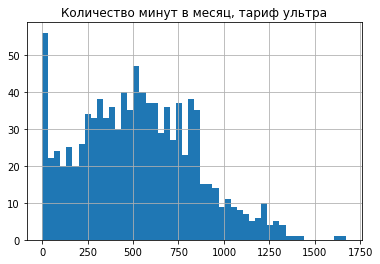

In [62]:
user_month_income.loc[user_month_income['tariff'] == 'ultra']['calls_min_total'].hist(bins = 50)
plt.title('Количество минут в месяц, тариф ультра') 

Text(0.5, 1.0, 'Количество минут в месяц, тариф смарт')

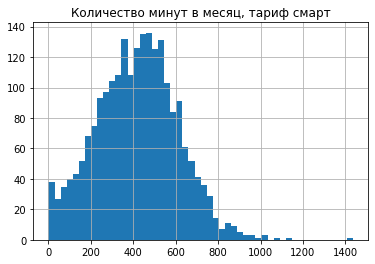

In [63]:
user_month_income.loc[user_month_income['tariff'] == 'smart']['calls_min_total'].hist(bins = 50)
plt.title('Количество минут в месяц, тариф смарт') 

Text(0.5, 1.0, 'График плотности, количество минут в месяц')

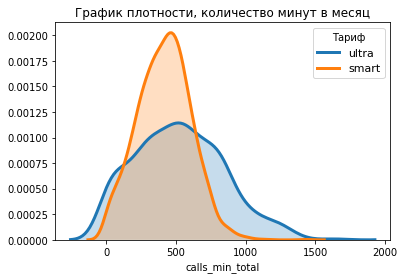

In [64]:
import seaborn as sns
                                                                     
tariffs = ['ultra', 'smart']

for tariff in tariffs:
    subset = user_month_income[user_month_income['tariff'] == tariff]
    sns.distplot(subset['calls_min_total'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = tariff) 

plt.legend(prop={'size': 11}, title = 'Тариф')
plt.title('График плотности, количество минут в месяц')


В данном случае график подверждает ранее сделанные выводы. Пользователи тарфиа ультра ведут себя более разбросанно, а пользователи тарифа смарт - концентрированее. 

Оба распределения тяготеют к нормальному: для пользователей тарифа ультра с большим станд отлконением, чем у смарт. 

Посмотрим на количество отправленных сообщений. 

In [65]:
user_month_income.loc[user_month_income['tariff'] == 'ultra']['messages_total'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_total, dtype: float64

In [66]:
user_month_income.loc[user_month_income['tariff'] == 'smart']['messages_total'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_total, dtype: float64

Картина похожа на историю с минутами разговора. 

Пользователи тарифа ультра с среднем отправляют 49 сообщений в месяц, при этом 50% пользователей - не более 38 сообщения. И только 25% всех пользователей отправляют более 79 сообщений в месяц. И это при включенной 1000. 

Потльзователи же тарифа смарт отправляют в среднем 33 сообщений, 50% - не более 28, а 75% - не более 51. При включеных 50. 

Опять можно сделать вывод, что пользователи тарифа смарт следят за количеством отправленных сообщений. 

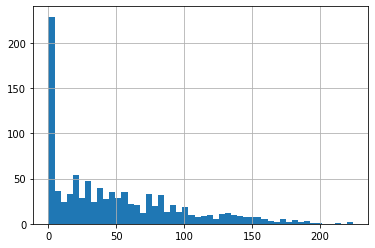

In [67]:
user_month_income.loc[user_month_income['tariff'] == 'ultra']['messages_total'].hist(bins = 50)

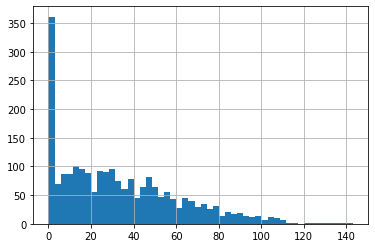

In [68]:
user_month_income.loc[user_month_income['tariff'] == 'smart']['messages_total'].hist(bins = 50)

Text(0.5, 1.0, 'График плотности, количество сообщений в месяц')

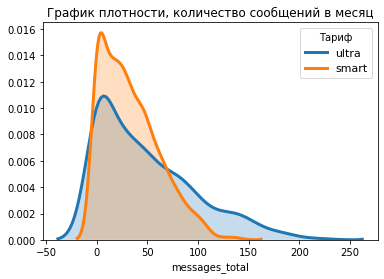

In [69]:
for tariff in tariffs:
    subset = user_month_income[user_month_income['tariff'] == tariff]
    sns.distplot(subset['messages_total'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = tariff) 

plt.legend(prop={'size': 11}, title = 'Тариф')
plt.title('График плотности, количество сообщений в месяц')

Однозначно можно сделать вывод, что сообщения выходят из моды: даже пользователи с включенными 3000 сообщениями, отправлют максимально 224 сообщения. И для обоих тарифов достаточно много случаев, когда сообщения вообще не отправлялись. В целом распределения похожи, но опять же пользователи тарифа ультра ведут себя более спокойней, с более широким размахом, а пользователи тарифа смарт ограничены 50 сообщениями. 

Распределение тяготеет к нормальному с пикоком 0 и смещенным вправо (так как количество сообщений не может быть отприцательным).

Посмотрим на количество используемого трафика. 

In [70]:
 user_month_income.loc[user_month_income['tariff'] == 'ultra']['mb_used_full'].describe()

count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used_full, dtype: float64

In [71]:
 user_month_income.loc[user_month_income['tariff'] == 'smart']['mb_used_full'].describe()

count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used_full, dtype: float64

Пользователи тарифа ультра в среднем ипользуют 19486 мб трафика в месяц, при этом 25% - не более 12 тыс мб, а 75% - не более 26863 мб. При включенных в пакет 30720 мб. 

Пользователи тарифа сматр в среднем используют 16229 мб трафика в месяц, при этом 25% - не более 12,5 мб, а 75% - не более 20068 мб. При включенных в пакет 15360 мб. 

В целом можно сказать, что пользователи ведут себя одинаково, однако судя по страндартному отклонению пользователи тарифа ульта ведут себе более разбросанно, когда пользователи тарифа смарт - кучнее и ближе к средним значениям. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'S')

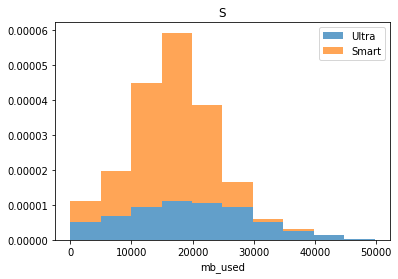

In [72]:
x1 = list(user_month_income.loc[user_month_income['tariff'] == 'ultra']['mb_used_full'])
x2 = list(user_month_income.loc[user_month_income['tariff'] == 'smart']['mb_used_full'])
                                                                         
colors = ['#F0E442', '#56B4E9']
names = ['Ultra', 'Smart']
                                                                         
plt.hist([x1, x2,], bins = 10, alpha = 0.7, density=True, label=names, stacked = True)
                                                                         
plt.legend()
plt.xlabel('mb_used')
plt.title('S')                                                                                                                                                  

Text(0.5, 1.0, 'График плотности, кол-во используемого трафика, мб')

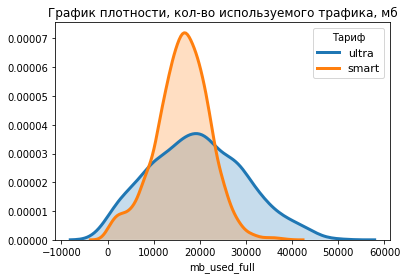

In [73]:
for tariff in tariffs:
    subset = user_month_income[user_month_income['tariff'] == tariff]
    sns.distplot(subset['mb_used_full'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = tariff) 

plt.legend(prop={'size': 11}, title = 'Тариф')
plt.title('График плотности, кол-во используемого трафика, мб')

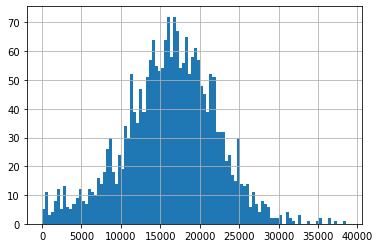

In [74]:
user_month_income.loc[user_month_income['tariff'] == 'smart']['mb_used_full'].hist(bins = 100)

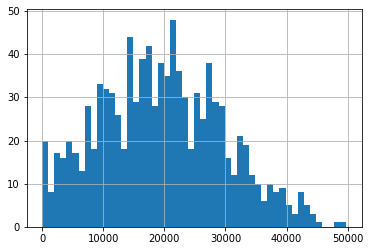

In [75]:
user_month_income.loc[user_month_income['tariff'] == 'ultra']['mb_used_full'].hist(bins = 50)

График плотности для кол-ва трафика похож на аналогичного для используемых минут. Но если на минутах и сообщениях пользователи тарифа смарт экономят, то на интернете не сильно. Здесь больше 50% доплачивают на трафик. 

Оба распределения тяготеют к нормальному, как и для распределения минут: для пользователей тарфиа ультра с большим станд. отлонением, чем для пользователей тарифа смарт. 

Посмотрим теперь ны выручку. Скупой платит дважды или все таки нет?

In [76]:
user_month_income.loc[user_month_income['tariff'] == 'smart']['total'].describe()

count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: total, dtype: float64

In [77]:
user_month_income.loc[user_month_income['tariff'] == 'ultra']['total'].describe()

count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total, dtype: float64

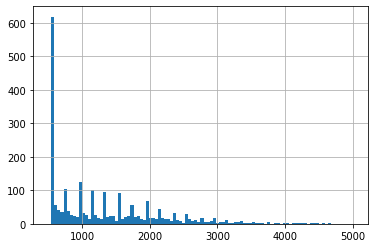

In [78]:
user_month_income.loc[user_month_income['tariff'] == 'smart']['total'].hist(bins = 100, range = (500, 5000))

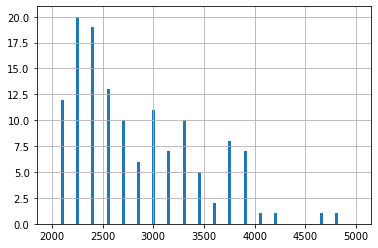

In [79]:
# гистограмма для пользователей, которые платят свыше а/п
user_month_income.loc[user_month_income['tariff'] == 'ultra']['total'].hist(bins = 100, range = (2000, 5000))

In [80]:
print('Всего пользоватей, которые доплачивают за трафик:', len(user_month_income.query('mb_used_full > 30720 and tariff == "ultra"')['user_id'].unique()))

Всего пользоватей, которые доплачивают за трафик: 43


Text(0.5, 1.0, 'График плотности, выручка, мб')

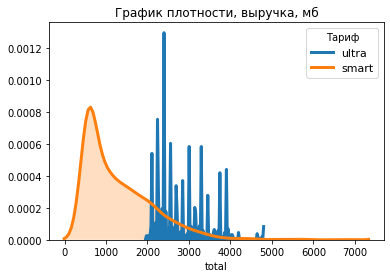

In [81]:
for tariff in tariffs:
    subset = user_month_income[user_month_income['tariff'] == tariff]
    sns.distplot(subset['total'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = tariff) 

plt.legend(prop={'size': 11}, title = 'Тариф')
plt.title('График плотности, выручка, мб')

На гистограмме выручки для пользователей тарифа смарт отчетливо видет пик в 550 рублей (25% платят только а/п), а далее видны пики с шагом 200 рублей - плата за дополнитльный ГБ. Пользователи тарифа ультра платят свою а/п, а далее только некоторые доплачивают за интернет по 150 рублей. 

In [82]:
for tariff in tariffs: 
    subset = user_month_income[user_month_income['tariff'] == tariff]
    print('Количество уникальных пользователей тарифа', tariff, ', доплчачивающих за трафик', len(subset[subset['internet_income'] != 0]['user_id'].unique()))
    print('Количество уникальных пользователей тарифа', tariff, ', доплчачивающих за смс', len(subset[subset['messages_income'] != 0]['user_id'].unique()))
    print('Количество уникальных пользователей тарифа', tariff, ', доплчачивающих за звонки', len(subset[subset['calls_income'] != 0]['user_id'].unique()))
    print()

Количество уникальных пользователей тарифа ultra , доплчачивающих за трафик 43
Количество уникальных пользователей тарифа ultra , доплчачивающих за смс 0
Количество уникальных пользователей тарифа ultra , доплчачивающих за звонки 0

Количество уникальных пользователей тарифа smart , доплчачивающих за трафик 312
Количество уникальных пользователей тарифа smart , доплчачивающих за смс 125
Количество уникальных пользователей тарифа smart , доплчачивающих за звонки 213



In [83]:
for tariff in tariffs: 
    subset = user_month_income[user_month_income['tariff'] == tariff]
    print('% уникальных пользователей тарифа', tariff, ', доплчачивающих за трафик', len(subset[subset['internet_income'] != 0]['user_id'].unique())/len(subset['user_id'].unique()))
    print('% уникальных пользователей тарифа', tariff, ', доплчачивающих за смс', len(subset[subset['messages_income'] != 0]['user_id'].unique())/len(subset['user_id'].unique()))
    print('% уникальных пользователей тарифа', tariff, ', доплчачивающих за звонки', len(subset[subset['calls_income'] != 0]['user_id'].unique())/len(subset['user_id'].unique()))
    print()

% уникальных пользователей тарифа ultra , доплчачивающих за трафик 0.2905405405405405
% уникальных пользователей тарифа ultra , доплчачивающих за смс 0.0
% уникальных пользователей тарифа ultra , доплчачивающих за звонки 0.0

% уникальных пользователей тарифа smart , доплчачивающих за трафик 0.8914285714285715
% уникальных пользователей тарифа smart , доплчачивающих за смс 0.35714285714285715
% уникальных пользователей тарифа smart , доплчачивающих за звонки 0.6085714285714285



In [84]:
internet_income_ultra_per = user_month_income.loc[user_month_income['tariff'] == 'ultra']['internet_income'].sum()/user_month_income.loc[user_month_income['tariff'] == 'ultra']['total'].sum()
internet_income_smart_per = user_month_income.loc[user_month_income['tariff'] == 'smart']['internet_income'].sum()/user_month_income.loc[user_month_income['tariff'] == 'smart']['total'].sum()

print('% прибыли от доплаты за трафик для пользователей тарифа ультра {:.2%}'.format(internet_income_ultra_per))
print('% прибыли от доплаты за трафик для пользователей тарифа смарт {:.2%}'.format(internet_income_smart_per))


% прибыли от доплаты за трафик для пользователей тарифа ультра 5.85%
% прибыли от доплаты за трафик для пользователей тарифа смарт 46.53%


In [85]:
# посмотрим на среднюю вырочку пользователя по месяцам
user_month_income.pivot_table(index = ('month'), columns = 'tariff', values = 'total', aggfunc = 'mean')

tariff,smart,ultra
month,,
1,721.323529,1950.000000
2,827.603448,1975.000000
3,1164.623377,2014.864865
4,963.089286,2001.818182
5,1204.602837,2061.940299
6,1208.896341,2041.071429
7,1228.925373,2121.428571
8,1329.106383,2083.177570
9,1255.330769,2024.347826


### Вывод
Пользователи тарифа ультра не выговаривают включенные минуты и сообщения, и только 29% доплачивают за интернет. Средняя прибыль по данным пользователям составляет 2071 рублей в месяц при 1950 рублей а/п.
Пользотвателем тарифа смарт не хватает ни интернета, ни смс, ни кол-ва включенных минут. 90% пользоватлей доплачивают за интернет, 35.7% за смс и 60% за звонки. Средняя прибыль - 1294 рубля при 550 рублей а/п.

Пользотвалеи тарифа смарт ведут себя более однородно, стараются не переплачивать за минуты и сообщения, но не немее свободно доплачивают за интернет, в отличие от пользователей тарифа ультра: распределение кол-ва используемых минут и отправленных сообщениее более разбросанное. Включенного трафика же многих хватает и только 29% доплачивают за интернет, а это всего лишь 5.85% в общей выручке для тарифа ультра, когда для пользотвалей тарифа смарт - это 46%. 

### Шаг 4. Проверим гипотезы
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Нулевая гипотеза - средние двух выборок равны между собой, альтернативная - различаются. 
Отвергаем нулевую гипотезу, и подверждаем гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [90]:
t1 = list(user_month_income.loc[user_month_income['tariff'] == 'ultra']['total'])
t2 = list(user_month_income.loc[user_month_income['tariff'] == 'smart']['total'])

In [94]:
print('Дисперсия для пользователей тарифа ультра равна:', np.var(user_month_income.loc[user_month_income['tariff'] == 'smart']['total'], ddof = 1))
print('Стандарное отклонение для пользователей тарифа утра равна:', np.std(user_month_income.loc[user_month_income['tariff'] == 'smart']['total'], ddof = 1))
print()
print('Дисперсия для пользователей арифа смарт равна:', np.var(user_month_income.loc[user_month_income['city'] != 'москва']['total'], ddof = 1))
print('Стандарное отклонение для пользователей тарифа смрат равна:', np.std(user_month_income.loc[user_month_income['city'] != 'москва']['total'], ddof = 1))


Дисперсия для пользователей тарифа ультра равна: 673931.3213632443
Стандарное отклонение для пользователей тарифа утра равна: 820.9332015232691

Дисперсия для пользователей арифа смарт равна: 656766.5955122437
Стандарное отклонение для пользователей тарифа смрат равна: 810.4113742490562


In [96]:
# дисперсии выборок примерно равны, поэтому передадим парметра equal_var как True

results = st.ttest_ind(t1, t2, equal_var = True)
print('p-значение:', results.pvalue)

alpha = .5

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Нулевая гипотеза - средняя выручка пользователей тарифов смарт и ультра равны между собой, альтернативная - различаются. 
Проведя t-тест, мы делаем вывод, что можем подвердить альтренативную гипотезу: средняя выручка тарифов различается.

In [ ]:
s1 = list(user_month_income.loc[user_month_income['city'] == 'москва']['total'])
s2 = list(user_month_income.loc[user_month_income['city'] != 'москва']['total'])

In [ ]:
print('Дисперсия для выборке по Москве равна:', np.var(user_month_income.loc[user_month_income['city'] == 'москва']['total'], ddof = 1))
print('Стандарное отклонение для выборке по Москве равна:', np.std(user_month_income.loc[user_month_income['city'] == 'москва']['total'], ddof = 1))
print()
print('Дисперсия для выборке по регионам равна:', np.var(user_month_income.loc[user_month_income['city'] != 'москва']['total'], ddof = 1))
print('Стандарное отклонение по регионам равна:', np.std(user_month_income.loc[user_month_income['city'] != 'москва']['total'], ddof = 1))


In [ ]:
#дисперсии выборок не равны, поэтому передадим парметра equal_var как False

results = st.ttest_ind(s1, s2, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нулеваая гипотеза - средние двух выборок равны между собой, альтернативная - различаются, т.е. среднее по москве == среднему по другим регионам. Так как не получилось отвергнуть нулевую гипотезу, то не можем подвердить гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, наоборот, можем выдвинуть гипотезу, что средние равны между собой. 
Посмотрим на цирфы.

In [ ]:
print('Средняя выручка по Москве', user_month_income.loc[user_month_income['city'] == 'москва']['total'].mean())
print('Cредняя выручка по другим регионам:', user_month_income.loc[user_month_income['city'] != 'москва']['total'].mean())

### Вывод
Проведя t-тест мы можем предположить, что средняя выручка тарифов смарт и ультра различаются, и что вредняя выручка по Москве и другим регионам не отличаются между собой. 

###  Шаг 5. Общий вывод

Однозначно можно сказать, что сообщения и телефонные звонки выходят из моды, и пользователи все больше и больше пользуются интернетом и доплачивают за трафик. В общей выручки по тарифу смарт 46% составляет выручка за дополнительный трафик. 

Средняя прибыль от пользователей тарифа ультра на 40% выше, чем от пользователей тарифа смарт: 1294 рубля в среднем платят пользователи тарифа смарт, и 1950 рублей - тарифа ультра. 
Тем не менее всего лишь 30% пользователей тарифа ультра доплачивают за доп. трафик и никто не доплачивает за смс и телефонные звонки. А пользователи тарифа смарт экономят на доплате за звонки и смс, но охотно плятят за интернет.

Средняя выручка по Москве и регионам не отличается и составляет около 1528-1540 рублей в месяц. 
 